In [6]:
import matplotlib.pyplot as plt

def build_dots(xs, ys):
    plt.plot(xs, ys, 'r')
    plt.grid()
    plt.show()

## Basic approximation funcs

In [7]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

def exponent(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.exp(b*x))
    return res

def ln(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.log(x, math.exp(1)) + b)
    return res

def power(xs, a, b):
    res = []
    for x in xs:
        res.append(a*pow(x, b))
    return res

## Sums and eps

In [20]:
def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

In [9]:
def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

# a3, a2, a1
def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def exponent_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    res = linear_approximation(xs, new_y)
    res[0] = math.exp(res[0])
    return res

def power_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    res = linear_approximation(new_x, new_y)
    res[0] = math.exp(res[0])
    return res

def logarithmic_approximation(xs, ys):
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    return linear_approximation(new_x, ys)

In [18]:
import time
from termcolor import cprint

def get_data(xs = None, ys = None, first_time = False):
    if (first_time):
        print("Okay then\nYou are here to approximate some functions, aren't you?")
        time.sleep(1)
        print("So, no time to lose")
        time.sleep(1)
        
    if (xs is None):
        print("Do you have some file with data?")
        # From file
    
        print("Okay, just type some x's for starters:")
        xs = input().split()
        try:
            for i in range(len(xs)):
                xs[i] = float(xs[i])
        except:
            cprint("Didn't you know that values should be represented as floats?", 'red')
            time.sleep(1)
            print("Lets try again...")
            get_data()


    print("Next, enter y's. I hope it isn't just random numbers...")
    ys = input().split()
    try:
        for i in range(len(ys)):
            ys[i] = float(ys[i])
    except:
        cprint("Didn't you know that values should be represented as floats?", 'red')
        time.sleep(1)
        print("Lets try again...")
        get_data(xs)
    return (xs, ys)

Okay then
You are here to approximate some functions, aren't you?
So, no time to lose
Do you have some file with data?
Okay, just type some x's for starters:
1 2 3
Next, enter y's. I hope it isn't just random numbers...
3 2 1

---------------Linear approximation---------------
phi(x) = -1.0x + 4.0
S = 0.0


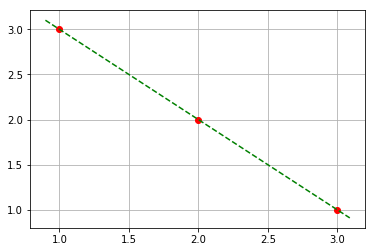

---------------Square approximation---------------
phi(x) = -0.0x^2 + -0.9999999999999734x + 3.9999999999999782
S = 3.01739296247037e-29


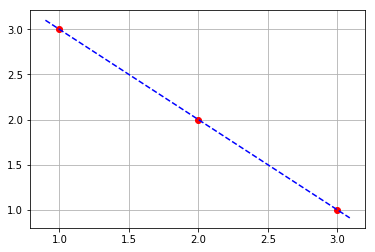

---------------Exponent approximation---------------
phi(x) = 0.5773502691896257 * e^(1.6958654450774613x)
S = 8791.704490330674


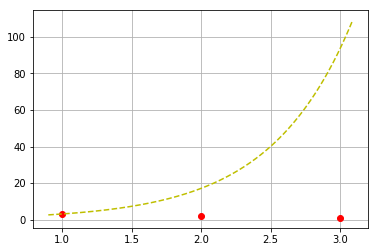

---------------Power approximation---------------
phi(x) = 0.3846936725785151 * x^1.1678138252022585
S = 4.194435227338005


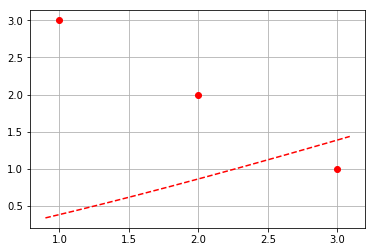

---------------Logarithm approximation---------------
phi(x) = -1.7797979662206576 + 3.062989953096232ln(x)
S = 0.04469208296347564


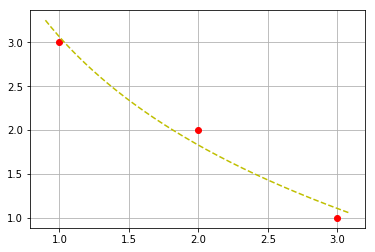

Are you ready to face the best approximation function for your data?
You, actually, don`t have a choise, just press any button to continue...


In [ ]:
import numpy as np

xs, ys = get_data(None, None, True)

plot_x = np.array(np.arange(xs[0] - 0.1, xs[len(xs) - 1] + 0.1, step = 0.01))

results = []

print("\n---------------Linear approximation---------------")

linear_c = linear_approximation(xs, ys)
ys_linear = linear(xs, linear_c[0], linear_c[1])
results.append(square_deviation(epsilon(ys, ys_linear)))

print(f"phi(x) = {linear_c[0]}x + {linear_c[1]}")
print(f"S = {standard_deviation(epsilon(ys, ys_linear))}")
plt.plot(xs, ys, 'ro',
         plot_x, linear(plot_x, linear_c[0], linear_c[1]), 'g--')
plt.grid()
plt.show()

print("---------------Square approximation---------------")

square_c = square_approximation(xs, ys)
ys_square = polynomial_second_degree(xs, square_c[2], square_c[1], square_c[0])
results.append(square_deviation(epsilon(ys, ys_square)))

print(f"phi(x) = {round(square_c[2], 3)}x^2 + {square_c[1]}x + {square_c[0]}")
print(f"S = {standard_deviation(epsilon(ys, ys_square))}")
plt.plot(xs, ys, 'ro',
         plot_x, polynomial_second_degree(plot_x, square_c[2], square_c[1], square_c[0]), 'b--')
plt.grid()
plt.show()

print("---------------Exponent approximation---------------")

exponent_c = exponent_approximation(xs, ys)
ys_exponent = exponent(xs, exponent_c[0], exponent_c[1])
results.append(square_deviation(epsilon(ys, ys_exponent)))

print(f"phi(x) = {exponent_c[0]} * e^({exponent_c[1]}x)")
print(f"S = {standard_deviation(epsilon(ys, ys_exponent))}")
plt.plot(xs, ys, 'ro',
         plot_x, exponent(plot_x, exponent_c[0], exponent_c[1]), 'y--')
plt.grid()
plt.show()

print("---------------Power approximation---------------")

power_c = power_approximation(xs, ys)
ys_power = power(xs, power_c[1], power_c[0])
results.append(square_deviation(epsilon(ys, ys_power)))

print(f"phi(x) = {power_c[0]} * x^{power_c[1]}")
print(f"S = {standard_deviation(epsilon(ys, ys_power))}")
plt.plot(xs, ys, 'ro',
         plot_x, power(plot_x, power_c[0], power_c[1]), 'r--')
plt.grid()
plt.show()

print("---------------Logarithm approximation---------------")

logarithm_c = logarithmic_approximation(xs, ys)
ys_logarithm = ln(xs, logarithm_c[0], logarithm_c[1])
results.append(square_deviation(epsilon(ys, ys_logarithm)))

print(f"phi(x) = {logarithm_c[0]} + {logarithm_c[1]}ln(x)")
print(f"S = {standard_deviation(epsilon(ys, ys_logarithm))}")
plt.plot(xs, ys, 'ro',
         plot_x, ln(plot_x, logarithm_c[0], logarithm_c[1]), 'y--')
plt.grid()
plt.show()

print("Are you ready to face the best approximation function for your data?")
print("You, actually, don`t have a choise, just press any button to continue...")
input()

best = min(results)

for i in range(len(results)):
    if best == results[i]:
        if i == 0:
            cprint("Linear approximation is the best!", 'green')
        elif i == 1:
            cprint("Square approximation is your bro, bro", 'green')
        elif i == 2:
            cprint("Exponent approximation rulez!", 'green')
        elif i == 3:
            cprint("There is some power in power approximation!", 'green')
        elif i == 4:
            cprint("Logarithm saved this day!", 'green')